In [5]:
import tensorflow as tf



In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow_hub as hub
from tensorflow.keras import layers


In [14]:
load_path = '/Users/allen/Desktop/tensorflow/model'
model = tf.keras.experimental.load_from_saved_model(load_path,
                                                       custom_objects={'KerasLayer':hub.KerasLayer})

#tf.keras.experimental.load_from_saved_model()加载model


In [9]:
data_root = '/Users/allen/.keras/datasets/flower_photos'
IMAGE_SHAPE = (224, 224)

## normalize+变换一下图片的size。
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
        ##批量处理image的方法（旋转，裁剪，翻转等的图片批量处理的方法）
        #rescale（num）像素标准化！所有像素矩阵直接*num后
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)
#flow_from_directory, 指的明输入的位置，以str的形式

Found 3670 images belonging to 5 classes.


In [10]:
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


In [12]:
import numpy as np
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

#tips：
#for的用法：
#[a + b for a in x for b in y if a%2 == 0 and b%2 ==0],一定用方括号廓起来
#这里两个for之间是嵌套的关系
#把x中的一个一个拿出来，赋值给a，同理从y中拿出来的元素，赋值给b，
#判定如果a和b都能被2整除，则执行a+b的操作


array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [15]:
#decode
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [16]:
label_id = np.argmax(label_batch, axis=-1)

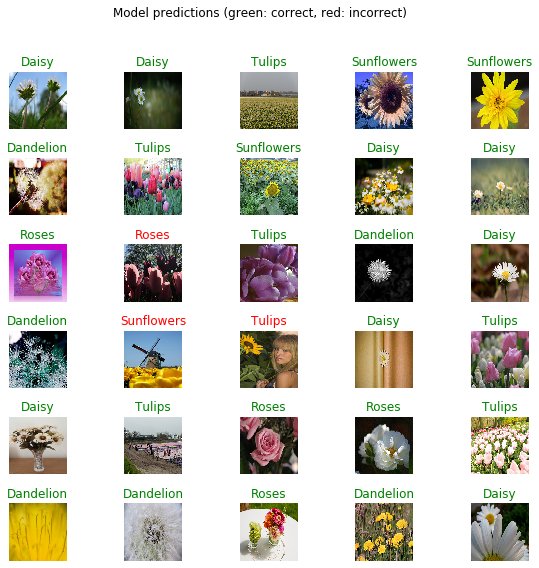

In [17]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")